<a href="https://colab.research.google.com/github/Angsumi/Cholera-CADD/blob/main/Cholera_trainig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install klib

In [ ]:
import numpy as np
import klib as kb
import pandas as pd


In [ ]:
data = pd.read_csv('/content/Cholera_data_with_lipinski.csv')

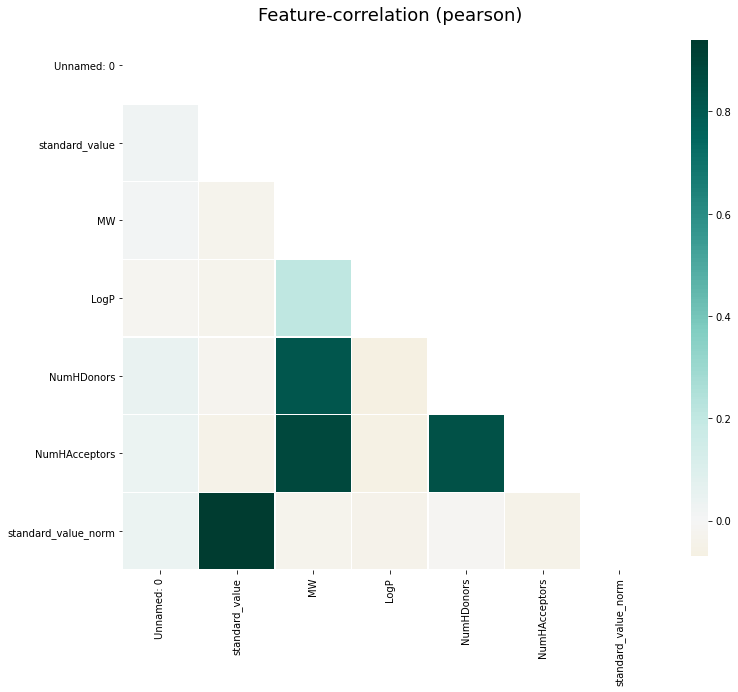

In [ ]:
a= kb.corr_plot(data, annot=False)


In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=239950 sha256=7c2600269282785e3faa6ce0666b18da17cc7592bf8093e34ad27567881ef1bc
  Stored in directory: /tmp/pip-ephem-wheel-cache-lkkafp0j/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
a.figure.savefig('correslation_matrix')

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile= ProfileReport(data, title='EDA')

In [ ]:
profile.to_file('assam.html')

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data


,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,0,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,bioactivity_class
0,0,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,2500.0,intermediate,398.374,4.30202,1.0,5.0,2500.0,intermediate
1,1,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,50000.0,inactive,398.374,4.30202,1.0,5.0,50000.0,inactive
2,2,CHEMBL109600,COc1ccccc1-c1ccc2oc(-c3ccc(OC)c(N4C(=O)c5ccc(C...,9000.0,intermediate,520.497,5.67780,1.0,7.0,9000.0,intermediate
3,3,CHEMBL357278,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)Nc4ccc(Cl)c(C(...,4000.0,intermediate,543.011,4.27292,2.0,7.0,4000.0,intermediate
4,4,CHEMBL357119,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)NCCc4ccccc4)CC...,17000.0,inactive,468.623,2.32092,2.0,7.0,17000.0,inactive
...,...,...,...,...,...,...,...,...,...,...,...
967,967,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,130.0,active,409.537,4.24370,1.0,5.0,130.0,active
968,968,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,212.0,active,409.537,4.24370,1.0,5.0,212.0,active
969,969,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,825.0,active,409.537,4.24370,1.0,5.0,825.0,active
970,970,CHEMBL62565,c1cnc(N2CCN(Cc3cccc4c3sc3ccccc34)CC2)nc1,100.0,active,360.486,4.16670,0.0,5.0,100.0,active


In [ ]:
data.drop(['standard_value_norm', '0'], axis=1, inplace=True)

In [ ]:
data

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors,bioactivity_class
0,0,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,2500.0,398.374,4.30202,1.0,5.0,intermediate
1,1,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,50000.0,398.374,4.30202,1.0,5.0,inactive
2,2,CHEMBL109600,COc1ccccc1-c1ccc2oc(-c3ccc(OC)c(N4C(=O)c5ccc(C...,9000.0,520.497,5.67780,1.0,7.0,intermediate
3,3,CHEMBL357278,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)Nc4ccc(Cl)c(C(...,4000.0,543.011,4.27292,2.0,7.0,intermediate
4,4,CHEMBL357119,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)NCCc4ccccc4)CC...,17000.0,468.623,2.32092,2.0,7.0,inactive
...,...,...,...,...,...,...,...,...,...
967,967,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,130.0,409.537,4.24370,1.0,5.0,active
968,968,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,212.0,409.537,4.24370,1.0,5.0,active
969,969,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,825.0,409.537,4.24370,1.0,5.0,active
970,970,CHEMBL62565,c1cnc(N2CCN(Cc3cccc4c3sc3ccccc34)CC2)nc1,100.0,360.486,4.16670,0.0,5.0,active


In [ ]:
data.drop(['standard_value'],inplace=True, axis=1)

In [ ]:
data1 = pd.DataFrame(data[data.bioactivity_class != 'intermediate'])

In [ ]:
pip install pycaret

In [ ]:
from pycaret.classification import *
data.drop(['canonical_smiles'], axis=1, inplace=True)

In [ ]:
clf = setup(data=data1, target='bioactivity_class')

,Description,Value
0,session_id,8641
1,Target,bioactivity_class
2,Target Type,Binary
3,Label Encoded,"active: 0, inactive: 1"
4,Original Data,"(807, 6)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7679,0.7874,0.5108,0.7187,0.5936,0.4399,0.4537,0.622
lightgbm,Light Gradient Boosting Machine,0.7659,0.7605,0.6089,0.6885,0.6420,0.4696,0.4746,0.072
gbc,Gradient Boosting Classifier,0.7571,0.7537,0.4163,0.7708,0.5346,0.3908,0.4274,0.300
catboost,CatBoost Classifier,0.7519,0.7794,0.4326,0.7378,0.5371,0.3851,0.4146,2.204
xgboost,Extreme Gradient Boosting,0.7517,0.7717,0.5474,0.6846,0.6012,0.4246,0.4353,1.438
et,Extra Trees Classifier,0.7448,0.7852,0.3853,0.7343,0.4969,0.3528,0.3875,0.628
ridge,Ridge Classifier,0.7414,0.0000,0.4068,0.7028,0.5096,0.3543,0.3801,0.055
dt,Decision Tree Classifier,0.7411,0.7038,0.5416,0.6569,0.5864,0.4013,0.4103,0.080
lda,Linear Discriminant Analysis,0.7235,0.7658,0.3655,0.6858,0.4652,0.3052,0.3369,0.099
knn,K Neighbors Classifier,0.7232,0.7125,0.4992,0.6225,0.5515,0.3549,0.3612,0.136


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8641, verbose=0,
                       warm_start=False)

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7544,0.7831,0.5000,0.7143,0.5882,0.4209,0.4345
1,0.7719,0.8912,0.4500,0.8182,0.5806,0.4416,0.4788
2,0.8246,0.8006,0.5789,0.8462,0.6875,0.5714,0.5913
3,0.6140,0.6711,0.2105,0.3636,0.2667,0.0294,0.0314
4,0.8036,0.8393,0.5789,0.7857,0.6667,0.5319,0.5444
5,0.7500,0.7575,0.5263,0.6667,0.5882,0.4123,0.4182
6,0.8571,0.8549,0.7368,0.8235,0.7778,0.6730,0.6753
7,0.7857,0.7980,0.4737,0.8182,0.6000,0.4675,0.5001
8,0.8393,0.8158,0.6842,0.8125,0.7429,0.6272,0.6321
9,0.6786,0.6629,0.3684,0.5385,0.4375,0.2234,0.2313


In [ ]:
model = tune_model(gbc, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.7655,0.4500,0.9000,0.6000,0.4779,0.5307
1,0.7719,0.8068,0.5000,0.7692,0.6061,0.4555,0.4765
2,0.7895,0.7701,0.4737,0.8182,0.6000,0.4706,0.5030
3,0.6316,0.6835,0.2105,0.4000,0.2759,0.0597,0.0652
4,0.7857,0.7703,0.3684,1.0000,0.5385,0.4353,0.5274
5,0.7321,0.6871,0.4211,0.6667,0.5161,0.3438,0.3611
6,0.8214,0.8122,0.5263,0.9091,0.6667,0.5563,0.5950
7,0.7500,0.7411,0.3158,0.8571,0.4615,0.3412,0.4134
8,0.8214,0.8016,0.6316,0.8000,0.7059,0.5802,0.5886
9,0.6607,0.6266,0.2632,0.5000,0.3448,0.1447,0.1583


In [ ]:
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.047, loss='deviance', max_depth=2,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4541, subsample=0.75, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
a=plot_model(model, 'confusion_matrix', save=True)

In [ ]:
b=plot_model(model, 'learning', save = True)

In [ ]:
! zip -r results.zip . -i *.csv *.pdf *.png *.html

  adding: sample_data/mnist_test.csv (deflated 88%)
  adding: sample_data/california_housing_test.csv (deflated 76%)
  adding: sample_data/california_housing_train.csv (deflated 79%)
  adding: sample_data/mnist_train_small.csv (deflated 88%)
